# Python Pandas

# 1. Data Preparation

## 1.1 Philadelphia 2019

### Trip Data

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
#import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt

from haversine import haversine
#from datetime import datetime

In [2]:
# import dataset
dfPhiladelphia = pd.read_csv("data/rentals/philadelphia_2019.csv")
dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge


In [3]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744260 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          744260 non-null  object
 1   end_time            744260 non-null  object
 2   start_station_id    744260 non-null  int64 
 3   end_station_id      744260 non-null  int64 
 4   bike_id             744260 non-null  int64 
 5   user_type           744225 non-null  object
 6   start_station_name  744260 non-null  object
 7   end_station_name    744260 non-null  object
dtypes: int64(3), object(5)
memory usage: 45.4+ MB


In [4]:
# Test if null values are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.dropna())

35

There are 35 rows with null values existing in dfPhiladelphia (but just in column user_type)

In [5]:
# Drop rows with null values
dfPhiladelphia.dropna(inplace=True)

In [6]:
# Test if duplicate rows are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.drop_duplicates(keep=False))

392

There are 196 duplicates in dfPhiladelphia.
Since no bike (unique bike_id) can be rented more than once at the same time we will drop the duplicates

In [7]:
# Drop duplicate rows
dfPhiladelphia.drop_duplicates(inplace=True, keep = False)

In [8]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743833 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          743833 non-null  object
 1   end_time            743833 non-null  object
 2   start_station_id    743833 non-null  int64 
 3   end_station_id      743833 non-null  int64 
 4   bike_id             743833 non-null  int64 
 5   user_type           743833 non-null  object
 6   start_station_name  743833 non-null  object
 7   end_station_name    743833 non-null  object
dtypes: int64(3), object(5)
memory usage: 51.1+ MB


In [9]:
# Data from the company to add additional features; Source: https://www.rideindego.com/about/data/
q1 = pd.read_csv("data/company_quartals/indego-trips-2019-q1.csv.zip")
q2 = pd.read_csv("data/company_quartals/indego-trips-2019-q2.csv.zip")
q3 = pd.read_csv("data/company_quartals/indego-trips-2019-q3-1.zip")
q4 = pd.read_csv("data/company_quartals/indego-trips-2019-q4.csv.zip")

dfPhiladelphia_comp = pd.concat(objs=[q1, q2, q3, q4])
dfPhiladelphia_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744260 entries, 0 to 166115
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              744260 non-null  int64  
 1   duration             744260 non-null  int64  
 2   start_time           744260 non-null  object 
 3   end_time             744260 non-null  object 
 4   start_station        744260 non-null  int64  
 5   start_lat            743837 non-null  float64
 6   start_lon            743837 non-null  float64
 7   end_station          744260 non-null  int64  
 8   end_lat              734002 non-null  float64
 9   end_lon              734002 non-null  float64
 10  bike_id              744260 non-null  int64  
 11  plan_duration        744253 non-null  float64
 12  trip_route_category  744260 non-null  object 
 13  passholder_type      744225 non-null  object 
 14  bike_type            744260 non-null  object 
dtypes: float64(5), in

In [10]:
# we use this dataset to merge the bike_type into our dfPhiladelphia dataframe
bikes = dfPhiladelphia_comp.copy()
bikes = bikes[["bike_id", "bike_type"]]
bikes.drop_duplicates(inplace=True)
bikes.head()

dfPhiladelphia = pd.merge(dfPhiladelphia, bikes, left_on="bike_id", right_on="bike_id", how="left")

In [11]:
# Test if null values are existing in dfPhiladelphia after first merge
len(dfPhiladelphia)-len(dfPhiladelphia.dropna())

0

In [12]:
# use the correct datatypes for the columns "start_time" and "end_time"
dfPhiladelphia['start_time'] = pd.to_datetime(dfPhiladelphia['start_time'])
dfPhiladelphia['end_time'] = pd.to_datetime(dfPhiladelphia['end_time'])

In [13]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743833 entries, 0 to 743832
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          743833 non-null  datetime64[ns]
 1   end_time            743833 non-null  datetime64[ns]
 2   start_station_id    743833 non-null  int64         
 3   end_station_id      743833 non-null  int64         
 4   bike_id             743833 non-null  int64         
 5   user_type           743833 non-null  object        
 6   start_station_name  743833 non-null  object        
 7   end_station_name    743833 non-null  object        
 8   bike_type           743833 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 56.7+ MB


In [14]:
# split date and time for start_time and end_time, but keep nonsplited for the weather data merge
dfPhiladelphia['start_time_for_weather_merge'] = dfPhiladelphia['start_time']
dfPhiladelphia['end_time_for_weather_merge'] = dfPhiladelphia['end_time']
dfPhiladelphia['start_date'] = dfPhiladelphia['start_time'].dt.round("H").dt.date
dfPhiladelphia['end_date'] = dfPhiladelphia['end_time'].dt.round("H").dt.date

dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_for_weather_merge,end_time_for_weather_merge,start_date,end_date
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,2019-01-01 00:19:00,2019-01-01 00:27:00,2019-01-01,2019-01-01
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,2019-01-01 00:30:00,2019-01-01 00:37:00,2019-01-01,2019-01-01
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,2019-01-01 00:52:00,2019-01-01 01:05:00,2019-01-01,2019-01-01
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,2019-01-01 00:55:00,2019-01-01 01:04:00,2019-01-01,2019-01-01
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,2019-01-01 01:05:00,2019-01-01 01:17:00,2019-01-01,2019-01-01


In [15]:
# Rounding time of dfPhiladelphia to hour
dfPhiladelphia['start_time_for_weather_merge'] = dfPhiladelphia["start_time_for_weather_merge"].dt.round("H")
dfPhiladelphia['end_time_for_weather_merge'] = dfPhiladelphia["end_time_for_weather_merge"].dt.round("H")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_for_weather_merge,end_time_for_weather_merge,start_date,end_date
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01,2019-01-01
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
743828,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",electric,2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01
743829,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01
743830,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01
743831,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,electric,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01


In [16]:
# Is the feature user_type valuable for our task? What values are inside?
dfPhiladelphia["user_type"].unique()

array(['Indego30', 'Day Pass', 'Indego365', 'IndegoFlex', 'Walk-up'],
      dtype=object)

The feature "user_type" could be valuable for Task 2 to investigate whether user behavior changes depending on the selected payment model. So we will keep it.

### Station Data (Coordinates)

In this section we will:
 - import the coordination data (latitude & longitude) for each station_id
 - merge latitude & longitude into dfPhiladelphia (merge over station_id)

In [17]:
# load station data using Python JSON module
with open('data/stations/stations.json','r') as f:
    stations = json.loads(f.read())
# Flatten data
dfStations = pd.json_normalize(stations, record_path =['features'])
dfStations

,type,geometry.coordinates,geometry.type,properties.id,properties.name,properties.coordinates,properties.totalDocks,properties.docksAvailable,properties.bikesAvailable,properties.classicBikesAvailable,...,properties.isEventBased,properties.isVirtual,properties.kioskId,properties.notes,properties.openTime,properties.publicText,properties.timeZone,properties.trikesAvailable,properties.latitude,properties.longitude
0,Feature,"[-75.16374, 39.95378]",Point,3004,Municipal Services Building Plaza,"[-75.16374, 39.95378]",30,7,22,18,...,False,False,3004,None,None,,None,0,39.95378,-75.16374
1,Feature,"[-75.14403, 39.94733]",Point,3005,"Welcome Park, NPS","[-75.14403, 39.94733]",13,4,8,5,...,False,False,3005,None,None,,None,0,39.94733,-75.14403
2,Feature,"[-75.20311, 39.9522]",Point,3006,40th & Spruce,"[-75.20311, 39.9522]",17,13,3,0,...,False,False,3006,None,None,,None,0,39.95220,-75.20311
3,Feature,"[-75.15993, 39.94517]",Point,3007,"11th & Pine, Kahn Park","[-75.15993, 39.94517]",20,16,4,3,...,False,False,3007,None,None,,None,0,39.94517,-75.15993
4,Feature,"[-75.15067, 39.98081]",Point,3008,Temple University Station,"[-75.15067, 39.98081]",17,9,8,2,...,False,False,3008,None,None,,None,0,39.98081,-75.15067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Feature,"[-75.16027, 39.95028]",Point,3295,12th & Chestnut,"[-75.16027, 39.95028]",21,12,9,4,...,False,False,3295,None,None,,None,0,39.95028,-75.16027
183,Feature,"[-75.16758, 39.95134]",Point,3296,16th & Chestnut,"[-75.16758, 39.95134]",21,16,4,1,...,False,False,3296,None,None,,None,0,39.95134,-75.16758
184,Feature,"[-75.20691, 39.94717]",Point,3298,42nd & Woodland,"[-75.20691, 39.94717]",21,17,4,0,...,False,False,3298,None,None,,None,0,39.94717,-75.20691
185,Feature,"[-75.15698, 39.94332]",Point,3299,9th & Lombard,"[-75.15698, 39.94332]",22,14,8,5,...,False,False,3299,None,None,,None,0,39.94332,-75.15698


In [18]:
dfStations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   type                               187 non-null    object 
 1   geometry.coordinates               187 non-null    object 
 2   geometry.type                      187 non-null    object 
 3   properties.id                      187 non-null    int64  
 4   properties.name                    187 non-null    object 
 5   properties.coordinates             187 non-null    object 
 6   properties.totalDocks              187 non-null    int64  
 7   properties.docksAvailable          187 non-null    int64  
 8   properties.bikesAvailable          187 non-null    int64  
 9   properties.classicBikesAvailable   187 non-null    int64  
 10  properties.smartBikesAvailable     187 non-null    int64  
 11  properties.electricBikesAvailable  187 non-null    int64  

In [19]:
dfStations = pd.DataFrame(dfStations, columns=['properties.id','properties.latitude','properties.longitude'])
dfStations.rename(columns={"properties.id": "station_id"}, inplace = True)
dfStations.rename(columns={"properties.latitude": "latitude"}, inplace = True)
dfStations.rename(columns={"properties.longitude": "longitude"}, inplace = True)
dfStations

,station_id,latitude,longitude
0,3004,39.95378,-75.16374
1,3005,39.94733,-75.14403
2,3006,39.95220,-75.20311
3,3007,39.94517,-75.15993
4,3008,39.98081,-75.15067
...,...,...,...
182,3295,39.95028,-75.16027
183,3296,39.95134,-75.16758
184,3298,39.94717,-75.20691
185,3299,39.94332,-75.15698


In [20]:
dfStations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  187 non-null    int64  
 1   latitude    187 non-null    float64
 2   longitude   187 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


In [21]:
#dfStations['longitude'], dfStations['latitude'] = zip(*dfStations['geometry.coordinates'])

In [22]:
dfStations.tail(70)

,station_id,latitude,longitude
117,3187,39.95725,-75.17232
118,3188,39.90471,-75.17340
119,3190,39.94892,-75.16991
120,3196,39.98717,-75.17477
121,3197,39.92083,-75.17033
...,...,...,...
182,3295,39.95028,-75.16027
183,3296,39.95134,-75.16758
184,3298,39.94717,-75.20691
185,3299,39.94332,-75.15698


#### Are all station coordinates we need in dfStations?

Let's see first for which stations we need coordinates:

In [23]:
# Get all unique start_station_id values in dfPhiladelphia
unique_start_station_ids_in_dfPhiladelphia = dfPhiladelphia["start_station_id"].unique()

# Get all unique end_station_id values in dfPhiladelphia
unique_end_station_ids_in_dfPhiladelphia = dfPhiladelphia["end_station_id"].unique()

# Concatenate unique start_station_id values and unique end_station_id values, afterwards show only unique values
unique_station_ids_in_dfPhiladelphia = np.sort(np.unique(np.concatenate((unique_start_station_ids_in_dfPhiladelphia, unique_end_station_ids_in_dfPhiladelphia))))

print(unique_station_ids_in_dfPhiladelphia, "\n\nThis are all Station_ids in dfPhiladelphia we need coordinates for.")

[3000 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016
 3017 3018 3019 3020 3021 3022 3024 3025 3026 3027 3028 3029 3030 3031
 3032 3033 3034 3035 3036 3037 3038 3039 3040 3041 3042 3043 3045 3046
 3047 3049 3050 3051 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061
 3062 3063 3064 3065 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075
 3077 3078 3086 3088 3093 3095 3096 3097 3098 3099 3100 3101 3102 3103
 3104 3105 3106 3107 3108 3110 3111 3112 3113 3114 3115 3116 3117 3118
 3119 3120 3121 3123 3124 3125 3129 3150 3152 3153 3154 3155 3156 3157
 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167 3168 3169 3170 3181
 3182 3183 3184 3185 3186 3187 3188 3190 3192 3195 3196 3197 3200 3201
 3202 3203 3204 3205 3206 3208 3209 3210] 

This are all Station_ids in dfPhiladelphia we need coordinates for.


Now let's see if we have them all in dfStations:

In [24]:
# Get all unique Station_id values in dfStations
unique_station_ids_in_dfStations = dfStations["station_id"].unique()

# Print all missing elements
missing_elements = [item for item in unique_station_ids_in_dfPhiladelphia if item not in unique_station_ids_in_dfStations]
print(missing_elements, "\n\nThere are no coordinates in dfStations for this station_ids!")

[3000, 3011, 3013, 3027, 3036, 3042, 3095, 3103, 3105, 3108, 3121, 3129, 3167, 3186, 3192, 3195, 3202, 3206] 

There are no coordinates in dfStations for this station_ids!


#### Add Missing Station Data Coordinates

- In the following we will add the missing station_ids & coordinates to dfStations
- For this task we extracted the data manually from official reports from the website (...) and wrote it into a csv, which we will import in the following step:

In [25]:
# import missing station coordinates dataset
dfMissingStationCoordinates = pd.read_csv("data/stations/manually_selected_missing_station_coordinates.csv")
dfMissingStationCoordinates

,station_id,latitude,longitude
0,3011,39.959492,-75.196899
1,3013,39.963169,-75.147919
2,3027,39.956940,-75.200691
3,3036,39.968441,-75.140007
4,3042,39.949421,-75.166130
5,3095,39.987709,-75.180519
6,3103,39.977139,-75.179398
7,3105,39.966518,-75.129959
8,3108,39.953159,-75.165512
9,3121,39.974140,-75.180222


In [26]:
# concatenate dfMissingStationCoordinates with dfStations
dfStations = pd.concat([dfStations, dfMissingStationCoordinates])
dfStations

,station_id,latitude,longitude
0,3004,39.953780,-75.163740
1,3005,39.947330,-75.144030
2,3006,39.952200,-75.203110
3,3007,39.945170,-75.159930
4,3008,39.980810,-75.150670
...,...,...,...
12,3186,39.893070,-75.171677
13,3192,39.962070,-75.141113
14,3195,39.954102,-75.169647
15,3202,39.951340,-75.167580


In [27]:
# Get all unique Station_id values in dfStations
unique_station_ids_in_dfStations = dfStations["station_id"].unique()

# Print all missing elements
missing_elements = [item for item in unique_station_ids_in_dfPhiladelphia if item not in unique_station_ids_in_dfStations]
print(missing_elements, "\n\nNow we have all station_ids and coordinates we need in dfStations! Station_id = 3000 is a so called virtual station, so for this station are no coordinates existing. We will later drop all rows with this station_id.")

[3000] 

Now we have all station_ids and coordinates we need in dfStations! Station_id = 3000 is a so called virtual station, so for this station are no coordinates existing. We will later drop all rows with this station_id.


#### Combine Station Data with Philadelphia Data

In this section we will:
 - add the latitude and longitude data from dfStations to dfPhiladelphia
 - drop the null values which occur because either start_station_id and/or end_station_id were the virtual station 3000, which we didn't include in dfStations

In [28]:
# merge start coordinates in dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfStations, left_on="start_station_id", right_on="station_id", how="left")
dfPhiladelphia.rename(columns={"latitude": "start_latitude"}, inplace = True)
dfPhiladelphia.rename(columns={"longitude": "start_longitude"}, inplace = True)
dfPhiladelphia.drop(columns = 'station_id', inplace = True)

# merge end coordinates in dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfStations, left_on="end_station_id", right_on="station_id", how="left")
dfPhiladelphia.rename(columns={"latitude": "end_latitude"}, inplace = True)
dfPhiladelphia.rename(columns={"longitude": "end_longitude"}, inplace = True)
dfPhiladelphia.drop(columns = 'station_id', inplace = True)

# show dataframe
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_for_weather_merge,end_time_for_weather_merge,start_date,end_date,start_latitude,start_longitude,end_latitude,end_longitude
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01,2019-01-01,39.94509,-75.142500,39.945170,-75.159930
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.94733,-75.144030,39.945170,-75.159930
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.97195,-75.134450,39.953820,-75.142630
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.96716,-75.170010,39.977139,-75.179398
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.95081,-75.169530,39.940610,-75.149580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743828,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",electric,2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01,39.96207,-75.141113,39.960620,-75.139830
743829,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01,39.94019,-75.166910,39.937240,-75.161200
743830,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01,39.94732,-75.156950,39.935490,-75.167110
743831,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,electric,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01,39.95081,-75.169530,39.940610,-75.149580


#### Check dfPhiladelphia for null values

In [29]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743833 entries, 0 to 743832
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   start_time                    743833 non-null  datetime64[ns]
 1   end_time                      743833 non-null  datetime64[ns]
 2   start_station_id              743833 non-null  int64         
 3   end_station_id                743833 non-null  int64         
 4   bike_id                       743833 non-null  int64         
 5   user_type                     743833 non-null  object        
 6   start_station_name            743833 non-null  object        
 7   end_station_name              743833 non-null  object        
 8   bike_type                     743833 non-null  object        
 9   start_time_for_weather_merge  743833 non-null  datetime64[ns]
 10  end_time_for_weather_merge    743833 non-null  datetime64[ns]
 11  start_date   

In [30]:
print("There are", len(dfPhiladelphia)-len(dfPhiladelphia.dropna()), "null values in dfPhiladelphia.\nThere are", 
      len(dfPhiladelphia["start_latitude"])-len(dfPhiladelphia["start_latitude"].dropna()), 'null values in dfPhiladelphia["start_latitude"].\nThere are',
      len(dfPhiladelphia["start_longitude"])-len(dfPhiladelphia["start_longitude"].dropna()), 'null values in dfPhiladelphia["start_longitude"].\nThere are',
      len(dfPhiladelphia["end_latitude"])-len(dfPhiladelphia["end_latitude"].dropna()), 'null values in dfPhiladelphia["end_latitude"].\nThere are',
      len(dfPhiladelphia["end_longitude"])-len(dfPhiladelphia["end_longitude"].dropna()), 'null values in dfPhiladelphia["end_longitude"].',
     )

There are 10536 null values in dfPhiladelphia.
There are 403 null values in dfPhiladelphia["start_latitude"].
There are 403 null values in dfPhiladelphia["start_longitude"].
There are 10213 null values in dfPhiladelphia["end_latitude"].
There are 10213 null values in dfPhiladelphia["end_longitude"].


In [31]:
# Get all unique station values where there is no latitude and/or longitude value AND ARE RELATED TO STATION_ID 3000
print(len(dfPhiladelphia[(dfPhiladelphia.isna().any(axis=1)) & ((dfPhiladelphia["start_station_id"] == 3000) | (dfPhiladelphia["end_station_id"] == 3000))]), "of the", len(dfPhiladelphia)-len(dfPhiladelphia.dropna()), "in dfPhiladelphia are related to station_id = 3000 (virtual station).")

10536 of the 10536 in dfPhiladelphia are related to station_id = 3000 (virtual station).


The null values are all related to the virtual station with station_id = 3000

#### Drop null values

In [32]:
# Drop rows with null values
dfPhiladelphia.dropna(inplace=True)

dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733297 entries, 0 to 743832
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   start_time                    733297 non-null  datetime64[ns]
 1   end_time                      733297 non-null  datetime64[ns]
 2   start_station_id              733297 non-null  int64         
 3   end_station_id                733297 non-null  int64         
 4   bike_id                       733297 non-null  int64         
 5   user_type                     733297 non-null  object        
 6   start_station_name            733297 non-null  object        
 7   end_station_name              733297 non-null  object        
 8   bike_type                     733297 non-null  object        
 9   start_time_for_weather_merge  733297 non-null  datetime64[ns]
 10  end_time_for_weather_merge    733297 non-null  datetime64[ns]
 11  start_date   

## 1.2 Weatherdata

In this section we will:
 - import the weather data
 - prepare the weather data
 - merge the weather data into dfPhiladelphia (merge over start_time_for_weather_merge)
 - after merge drop start_time_for_weather_merge

In [33]:
# import dataset: weather data
dfWeather = pd.read_csv("data/weather/weather_hourly_philadelphia.csv")
dfWeather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [34]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43785 non-null  object 
 1   max_temp   43785 non-null  float64
 2   min_temp   43785 non-null  float64
 3   precip     43785 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


#### Change datatypes & test for null values and duplicate rows

In [35]:
# Change datatype of 'date_time' from object to datetime
dfWeather['date_time'] = pd.to_datetime(dfWeather['date_time'])

# Since we only look at data from 2019, we can drop all rows from other years. 
dfWeather = dfWeather[(dfWeather['date_time']>=datetime.datetime(year=2019, month=1, day=1, hour=0, minute=0, second=0))
         & (dfWeather['date_time']<=datetime.datetime(year=2020, month=1, day=1, hour=0, minute=0, second=0))]

# Reset index to new time intervall of 2019
dfWeather.reset_index(drop=True, inplace=True)

## Integrity Tests

# Test if there are null values in dfWeather
print("There are", len(dfWeather)-len(dfWeather.dropna()), "values in dfWeather.")

# Test if there are duplicate rows in dfWeather
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates()), "duplicate rows in dfWeather.")

There are 0 values in dfWeather.
There are 111 duplicate rows in dfWeather.


In [36]:
# Show duplicates
dfWeather[dfWeather.duplicated(keep=False)]

,date_time,max_temp,min_temp,precip
59,2019-01-03 06:00:00,5.0,5.0,0.0
60,2019-01-03 06:00:00,5.0,5.0,0.0
61,2019-01-03 08:00:00,5.0,5.0,0.0
62,2019-01-03 08:00:00,5.0,5.0,0.0
63,2019-01-03 10:00:00,5.0,5.0,0.0
...,...,...,...,...
8715,2019-12-30 22:00:00,6.7,6.7,0.0
8720,2019-12-31 09:00:00,3.9,3.9,0.0
8721,2019-12-31 09:00:00,3.9,3.9,0.0
8722,2019-12-31 11:00:00,3.9,3.9,0.0


In [37]:
# drop duplicate rows
dfWeather.drop_duplicates(inplace=True)

# Test if there are duplicate rows in dfWeather
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates()), "duplicate rows in dfWeather.")

There are 0 duplicate rows in dfWeather.


#### Test and drop date_time duplicates

In [38]:
# Test for datetime duplicates
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates(subset='date_time')), "datetime duplicates in dfWeather.")

There are 427 datetime duplicates in dfWeather.


In [39]:
# Save the average values of all duplicates in a new dataframe "average"
average = dfWeather[dfWeather['date_time'].duplicated(keep=False)].sort_values(by='date_time').groupby('date_time').mean()

# Reset index of dataframe "average" for concatenation
average.reset_index(inplace=True)

# drop all datetime duplicates in dfWeather
dfWeather.drop_duplicates(subset='date_time',keep=False,inplace=True)

# concatenate dataframes "average" & "dfWeather"
dfWeather = pd.concat([dfWeather,average])

# Sort date_time values in dfWeather
dfWeather.sort_values(by='date_time',inplace=True)

# Reset index of dfWeather
dfWeather.reset_index(inplace=True)

# Drop index column
dfWeather.drop(columns='index',inplace=True)

# Test for datetime duplicates
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates(subset='date_time')), "datetime duplicates in dfWeather.")
dfWeather

There are 0 datetime duplicates in dfWeather.


,date_time,max_temp,min_temp,precip
0,2019-01-01 00:00:00,6.95,6.4,0.5
1,2019-01-01 02:00:00,7.20,7.2,1.0
2,2019-01-01 03:00:00,8.05,7.8,1.0
3,2019-01-01 04:00:00,9.40,8.3,1.0
4,2019-01-01 05:00:00,11.10,10.6,1.0
...,...,...,...,...
8193,2019-12-31 20:00:00,7.80,7.8,0.0
8194,2019-12-31 21:00:00,8.30,8.3,0.0
8195,2019-12-31 22:00:00,8.30,8.3,0.0
8196,2019-12-31 23:00:00,7.80,7.8,0.0


We still don't have all date_time values we need.

#### Create missing date_time rows

In [40]:
# Create missing date_time values & fill them with the average values from adjacent values
dfWeather = dfWeather.set_index('date_time').resample('H').mean().resample('H').interpolate(method = 'linear').reset_index(inplace = False)
dfWeather

,date_time,max_temp,min_temp,precip
0,2019-01-01 00:00:00,6.950,6.4,0.50
1,2019-01-01 01:00:00,7.075,6.8,0.75
2,2019-01-01 02:00:00,7.200,7.2,1.00
3,2019-01-01 03:00:00,8.050,7.8,1.00
4,2019-01-01 04:00:00,9.400,8.3,1.00
...,...,...,...,...
8756,2019-12-31 20:00:00,7.800,7.8,0.00
8757,2019-12-31 21:00:00,8.300,8.3,0.00
8758,2019-12-31 22:00:00,8.300,8.3,0.00
8759,2019-12-31 23:00:00,7.800,7.8,0.00


#### Restore column precip, because of average function

In [41]:
# Test if we have wrong values in precip, because of using the average for missing rows 
dfWeather["precip"].unique()

array([0.5 , 0.75, 1.  , 0.  , 0.25, 0.05, 0.1 , 0.15, 0.2 , 0.3 , 0.35,
       0.4 , 0.45, 0.55, 0.6 , 0.65, 0.7 , 0.8 , 0.85, 0.9 , 0.95])

In [42]:
# Delete values, which are not 1 or 0 in precip
for i in dfWeather.index:
    if (dfWeather['precip'][i] > 0) and (dfWeather['precip'][i] < 1): 
        dfWeather.loc[i,'precip'] = np.nan

# Fill missing values using backwardsfill
dfWeather.fillna(method = 'bfill',inplace=True)

print("Unique values of dfWeather:", dfWeather["precip"].unique())

Unique values of dfWeather: [1. 0.]


#### Change datatype & name of column precip

In [43]:
# Change 0.0 and 1.0 to boolean values for better interpretation of context
dfWeather["precip"] = dfWeather["precip"].map({1.:True, 0.:False})

# rename column to isPrecip
dfWeather.rename(columns={"precip": "isPrecip"}, inplace = True)

# Show all unique values in "isPrecip"
dfWeather["isPrecip"].unique()

array([ True, False])

In [44]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8761 non-null   datetime64[ns]
 1   max_temp   8761 non-null   float64       
 2   min_temp   8761 non-null   float64       
 3   isPrecip   8761 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 214.0 KB


8761 rows are what we needed, because we need for every hour on every day of 2019: 365 * 24= 8760 + one hour of 2020 (Later, we are likely to drop values that fall into 2020 if they are not of significant size)

#### Outlier Checks

Now we check if the values are reasonable (e.g. maximum temperature and minimum temperature realistic) or if there are outliers.

In [45]:
# Outlier Checks of max & min temperature
print("Max value in max_temp:", dfWeather['max_temp'].max())
print("Min value in max_temp:", dfWeather['max_temp'].min())
print("Max value in min_temp:", dfWeather['min_temp'].max())
print("Min value in min_temp:", dfWeather['min_temp'].min())

Max value in max_temp: 36.7
Min value in max_temp: -14.4
Max value in min_temp: 36.7
Min value in min_temp: -14.4


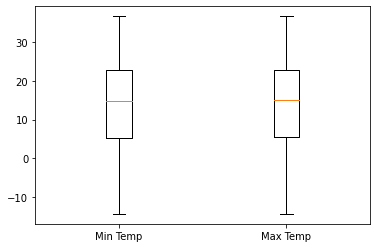

In [46]:
temperature_dict = {'Min Temp': dfWeather['min_temp'], 'Max Temp': dfWeather['max_temp']}

fig, ax = plt.subplots()
ax.boxplot(temperature_dict.values())
ax.set_xticklabels(temperature_dict.keys())
plt.show()

The values do look reasonable.

#### Save dfWeather

In [47]:
dfWeather.to_csv("data/exports/dfWeather.csv", index = False)

#### Merge the prepared Weatherdata into dfPhiladelphia

In [48]:
# merge
dfPhiladelphia = pd.merge(dfPhiladelphia, dfWeather, left_on="start_time_for_weather_merge", right_on="date_time", how="left")
dfPhiladelphia.drop(columns = 'date_time', inplace = True)

# rename
dfPhiladelphia.rename(columns={"start_time_for_weather_merge": "start_time_hourly"}, inplace = True)
dfPhiladelphia.rename(columns={"end_time_for_weather_merge": "end_time_hourly"}, inplace = True)

# reformat to only hour & integer
dfPhiladelphia['start_time_hourly'] = dfPhiladelphia['start_time_hourly'].dt.hour
dfPhiladelphia['end_time_hourly'] = dfPhiladelphia['end_time_hourly'].dt.hour

## 1.3 Additional Features
- in this section, we will add additional features, we could use for tasks 2 (Descriptive analytics), 3 (Cluster Analysis) & 4 (Predictive Analytics)

**FEATURE: `dayOfWeek`**
- The day of the week with Monday to Sunday (we decided us against using 0=Monday and 6=Sunday, because of readability & interpretability).

In [49]:
dfPhiladelphia['dayOfWeek'] = pd.to_datetime(dfPhiladelphia["start_date"]).dt.day_name()

**FEATURE: `isWeekend`**

In [50]:
def isWeekend(dayOfWeek):
    if(dayOfWeek in ["Saturday","Sunday"]):
        return True
    else:
        return False

In [51]:
dfPhiladelphia["isWeekend"] = dfPhiladelphia["dayOfWeek"].map(isWeekend)

**FEATURE: `isHoliday`**
- You need to install holidays

In [52]:
# pip install holidays

In [53]:
from datetime import date
import holidays

# Select country
us_holidays = holidays.US()
us_holidays

holidays.country_holidays('US')

In [54]:
dfPhiladelphia = dfPhiladelphia.assign(isHoliday=lambda x: x["start_date"].apply(lambda h: h in us_holidays))

**FEATURE: `season`**

In [55]:
# Returns the day of the year
def day_match(ts):
    return pd.Period(ts, freq='D').day_of_year

#seasons = {'spring': (start='2019-03-20', end='2019-06-20'),
#           'summer': (start='2019/06/21', end='2019/09/22'),
#           'autumn': (start='2019/09/23', end='2019/12/21'),
#           'winter': rest}

# Create Array to map days to seasons (1 - 4)
seasons = ['winter' for i in range(0,78)]
seasons.extend('spring' for i in range(0,93))
seasons.extend('summer' for i in range(0,94))
seasons.extend('autumn' for i in range(0,90))
seasons.extend('winter' for i in range(0,10))

# Create dictionary for lambda expression
day_to_season = {}
for i in range(0,365):
    day_to_season[i+1] = seasons[i]
    
# Map start_date to day of the year (day_match) and afterwards map this to seasonnames (day_to_season)
dfPhiladelphia["season"] = dfPhiladelphia["start_date"].map(day_match).map(day_to_season)

In [56]:
print("In 2019 there were:\n", 
      "•", pd.Period("2019-03-19").day_of_year + (pd.Period("2019-12-31").day_of_year - pd.Period("2019/12/21").day_of_year), "winter days\n", 
      "•", pd.Period("2019/06/20").day_of_year - pd.Period("2019-03-19").day_of_year, "spring days\n",
      "•", pd.Period("2019/09/22").day_of_year - pd.Period("2019/06/20").day_of_year, "summer days\n",
      "•", pd.Period("2019/12/21").day_of_year - pd.Period("2019/09/22").day_of_year, "autumn days\n")

In 2019 there were:
 • 88 winter days
 • 93 spring days
 • 94 summer days
 • 90 autumn days



**FEATURE: `isRushhour`**
- Wikipedia: Rush hour may be 5–9 AM (5:00–9:00) and 4–8 PM (sometimes from 4-9 PM) (16:00–20:00 (sometimes from 16:00-21:00))
- TomTom: https://www.tomtom.com/traffic-index/philadelphia-traffic/#:~:text=2020-,2019,-Best%20time%20to
- We took the TomTom statistics for deciding, when rushhour is starting and ending, since it is tailored for Philadelphia 2019 traffic

In [57]:
# Create feature isRushour
def isRushhour(time):
    if (time in [7,8,9,16,17,18,19]):
        return True
    else: 
        return False

dfPhiladelphia['isRushhour'] = dfPhiladelphia['start_time_hourly'].apply(lambda x:isRushhour(x))

**FEATURE: `tripduration_sec`**

In [58]:
dfPhiladelphia["tripduration_sec"] = (pd.to_datetime(dfPhiladelphia["end_time"]) - pd.to_datetime(dfPhiladelphia["start_time"])).dt.seconds

In [59]:
# Check for Outliers, we will drop the trips with 0 seconds tripduration in this step, but we will drop the trips with very high duration later using zscores.
dfPhiladelphia['tripduration_sec'].describe()

count    733297.000000
mean       1316.767692
std        3488.792401
min           0.000000
25%         420.000000
50%         660.000000
75%        1140.000000
max       86280.000000
Name: tripduration_sec, dtype: float64

In [60]:
print("There are", len(dfPhiladelphia[dfPhiladelphia['tripduration_sec']==0]), "trips with 0 seconds of tripduration.")

There are 40 trips with 0 seconds of tripduration.


In [61]:
dfPhiladelphia.drop(dfPhiladelphia[dfPhiladelphia['tripduration_sec']==0].index,inplace=True)
print("There are", len(dfPhiladelphia[dfPhiladelphia['tripduration_sec']==0]), "trips with 0 seconds of tripduration.")

There are 0 trips with 0 seconds of tripduration.


**FEATURE: `distance (km)`**

In [62]:
dfPhiladelphia["start"] = dfPhiladelphia.apply(lambda row: [row["start_latitude"], row["start_longitude"]], axis=1)
dfPhiladelphia["end"] = dfPhiladelphia.apply(lambda row: [row["end_latitude"], row["end_longitude"]], axis=1)
dfPhiladelphia["distance (km)"] = dfPhiladelphia.apply(lambda row: haversine(row["start"], row["end"]), axis=1)
dfPhiladelphia[["start", "end", "distance (km)"]]

,start,end,distance (km)
0,"[39.94509, -75.1425]","[39.94517, -75.15993]",1.485913
1,"[39.94733, -75.14403]","[39.94517, -75.15993]",1.376549
2,"[39.97195, -75.13445]","[39.95382, -75.14263]",2.133107
3,"[39.96716, -75.17001]","[39.977139, -75.179398]",1.367935
4,"[39.95081, -75.16953]","[39.94061, -75.14958]",2.044202
...,...,...,...
733292,"[39.96207, -75.141113]","[39.96062, -75.13983]",0.194816
733293,"[39.94019, -75.16691]","[39.93724, -75.1612]",0.587019
733294,"[39.94732, -75.15695]","[39.93549, -75.16711]",1.575003
733295,"[39.95081, -75.16953]","[39.94061, -75.14958]",2.044202


In [63]:
print("There are", len(dfPhiladelphia[dfPhiladelphia['distance (km)']==0]), "trips with 0 km of tripdistance.")

There are 53422 trips with 0 km of tripdistance.


In [64]:
dfPhiladelphia.drop(dfPhiladelphia[dfPhiladelphia['distance (km)']==0].index,inplace=True)
print("There are", len(dfPhiladelphia[dfPhiladelphia['distance (km)']==0]), "trips with 0 km of tripdistance.")

There are 0 trips with 0 km of tripdistance.


In [65]:
print("The minimum trip distance in our dataset is now:", dfPhiladelphia['distance (km)'].min(), "km.")

The minimum trip distance in our dataset is now: 0.05797225069542511 km.


In [66]:
dfPhiladelphia.drop(columns = ['start','end'], inplace = True)

**FEATURE: `velocity (km/h)`**

In [67]:
dfPhiladelphia['velocity (km/h)'] = dfPhiladelphia['distance (km)']/(dfPhiladelphia['tripduration_sec']/3600)

**FEATURE: `start_week & start_month`**

In [68]:
# also add start_week & start_month, which we will use later for merges and which could be useful as x-axis in Task 2
dfPhiladelphia['start_week'] = dfPhiladelphia['start_time'].dt.round("H").dt.isocalendar()["week"]
## The month as January=1, December=12.
dfPhiladelphia['start_month'] = dfPhiladelphia['start_time'].dt.round("H").dt.month

### Outlier Check
- In this section we need to remove the outliers, before we can start counting and aggregating the number of rented bikes per specific time period and store them as additional features (numOfRentedBikesX).

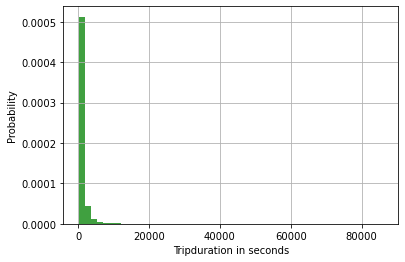

In [69]:
# the histogram of the data
n, bins, patches = plt.hist(dfPhiladelphia['tripduration_sec'], 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripduration in seconds')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

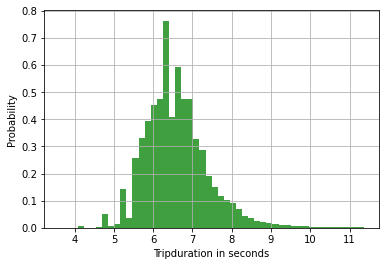

In [70]:
# the histogram of the data
n, bins, patches = plt.hist(np.log(dfPhiladelphia['tripduration_sec']), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripduration in seconds')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

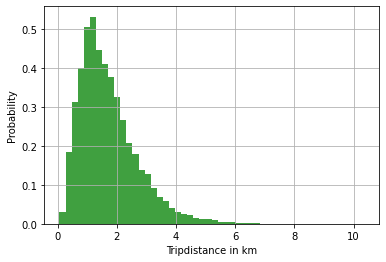

In [71]:
# the histogram of the data
n, bins, patches = plt.hist(dfPhiladelphia['distance (km)'], 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripdistance in km')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

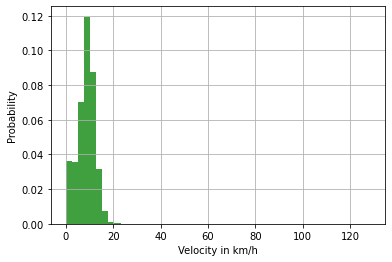

In [72]:
n, bins, patches = plt.hist(dfPhiladelphia['velocity (km/h)'], 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Velocity in km/h')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [73]:
from scipy.stats import zscore

def remove_outliers(df,excluded_cols=None,zscore_threshold=2,verbose=False):
    
    outlier_count = 0
    df_numeric_view = df.select_dtypes(include="number")

    for col in df_numeric_view.columns:
        if excluded_cols and col in excluded_cols:
            continue
        df[f"{col}_zscore"] = np.around(np.abs(zscore(np.log(df[col]))), decimals=1)
        outlier = df[df[f"{col}_zscore"] > zscore_threshold]
        outlier_count += outlier.shape[0]
        df.drop(outlier.index, inplace=True)
        if verbose:
            print(
                f"--> {outlier.shape[0]} outlier detected and removed from {col} column using zscore"
            )
    df = df.loc[:, ~df.columns.str.contains("zscore")]

    print(f"Outlier detection completed. Number of removed outlier: {outlier_count}")

    return df.reset_index(drop=True)

In [74]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679835 entries, 0 to 733296
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          679835 non-null  datetime64[ns]
 1   end_time            679835 non-null  datetime64[ns]
 2   start_station_id    679835 non-null  int64         
 3   end_station_id      679835 non-null  int64         
 4   bike_id             679835 non-null  int64         
 5   user_type           679835 non-null  object        
 6   start_station_name  679835 non-null  object        
 7   end_station_name    679835 non-null  object        
 8   bike_type           679835 non-null  object        
 9   start_time_hourly   679835 non-null  int64         
 10  end_time_hourly     679835 non-null  int64         
 11  start_date          679835 non-null  object        
 12  end_date            679835 non-null  object        
 13  start_latitude      679835 no

In [75]:
dfPhiladelphia = remove_outliers(dfPhiladelphia,excluded_cols=['start_time','end_time','start_station_id','end_station_id',
                'bike_id','user_type', 'start_station_name','end_station_name', 'start_time_hourly',
                'end_time_hourly', 'start_date', 'end_date', 'start_latitude','start_longitude',
                'end_longitude','end_latitude','max_temp',
                'min_temp', 'isPrecip', 'dayOfWeek', 'isWeekend', 'isHoliday', 'season', 'isRushhour',                         
                'start', 'end','start_week','start_month'],zscore_threshold=2,verbose=True)

--> 30053 outlier detected and removed from tripduration_sec column using zscore
--> 26356 outlier detected and removed from distance (km) column using zscore
--> 34211 outlier detected and removed from velocity (km/h) column using zscore
Outlier detection completed. Number of removed outlier: 90620


Now that we have removed the outliers, we can start counting and aggregating the number of rented bikes per specific time period and store them as additional features (numOfRentedBikesX).

### Additional Features: numOfRentedBikesX

**FEATURE: `numOfRentedBikesHourly` (Total system-level demand!)**

In [76]:
# Create temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia.copy()[["start_date", "start_time_hourly"]]
dfNumOfRentedBikes['numOfRentedBikesHourly'] = 0
dfNumOfRentedBikes.head()

,start_date,start_time_hourly,numOfRentedBikesHourly
0,2019-01-01,0,0
1,2019-01-01,0,0
2,2019-01-01,1,0
3,2019-01-01,1,0
4,2019-01-01,1,0


In [77]:
# Calculate numOfRentedBikesHourly for each start_date & start_time_hourly
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_date", "start_time_hourly"])['numOfRentedBikesHourly'].count().reset_index()
dfNumOfRentedBikes

,start_date,start_time_hourly,numOfRentedBikesHourly
0,2019-01-01,0,2
1,2019-01-01,1,8
2,2019-01-01,2,10
3,2019-01-01,3,7
4,2019-01-01,4,3
...,...,...,...
8559,2019-12-31,20,33
8560,2019-12-31,21,24
8561,2019-12-31,22,26
8562,2019-12-31,23,21


In [78]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_date", "start_time_hourly"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_hourly,...,isWeekend,isHoliday,season,isRushhour,tripduration_sec,distance (km),velocity (km/h),start_week,start_month,numOfRentedBikesHourly
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,0,...,False,True,winter,False,480,1.485913,11.144347,1,1,2
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,0,...,False,True,winter,False,420,1.376549,11.798991,1,1,2
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,1,...,False,True,winter,False,780,2.133107,9.845110,1,1,8
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,1,...,False,True,winter,False,540,1.367935,9.119566,1,1,8
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,1,...,False,True,winter,False,720,2.044202,10.221011,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589210,2019-12-31 23:25:08,2019-12-31 23:37:54,3018,3005,3541,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,False,False,winter,False,766,1.471507,6.915700,1,12,21
589211,2019-12-31 23:25:30,2019-12-31 23:37:51,3018,3005,11868,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,False,False,winter,False,741,1.471507,7.149024,1,12,21
589212,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,23,...,False,False,winter,False,227,0.587019,9.309545,1,12,21
589213,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,0,...,False,True,winter,False,449,1.575003,12.628089,1,1,2


**FEATURE: `numOfRentedBikesDaily` (Total system-level demand!)**

In [79]:
# Overwrite temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia[["start_date"]]
dfNumOfRentedBikes['numOfRentedBikesDaily'] = 0
dfNumOfRentedBikes.head()

<ipython-input-79-c166de7ebfa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumOfRentedBikes['numOfRentedBikesDaily'] = 0


,start_date,numOfRentedBikesDaily
0,2019-01-01,0
1,2019-01-01,0
2,2019-01-01,0
3,2019-01-01,0
4,2019-01-01,0


In [80]:
# Calculate numOfRentedBikesDaily for each start_date
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_date"])['numOfRentedBikesDaily'].count().reset_index()
dfNumOfRentedBikes

,start_date,numOfRentedBikesDaily
0,2019-01-01,585
1,2019-01-02,1017
2,2019-01-03,1170
3,2019-01-04,1260
4,2019-01-05,404
...,...,...
361,2019-12-28,707
362,2019-12-29,404
363,2019-12-30,465
364,2019-12-31,950


In [81]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_date"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_hourly,...,isHoliday,season,isRushhour,tripduration_sec,distance (km),velocity (km/h),start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,0,...,True,winter,False,480,1.485913,11.144347,1,1,2,585
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,0,...,True,winter,False,420,1.376549,11.798991,1,1,2,585
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,1,...,True,winter,False,780,2.133107,9.845110,1,1,8,585
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,1,...,True,winter,False,540,1.367935,9.119566,1,1,8,585
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,1,...,True,winter,False,720,2.044202,10.221011,1,1,8,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589210,2019-12-31 23:25:08,2019-12-31 23:37:54,3018,3005,3541,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,False,winter,False,766,1.471507,6.915700,1,12,21,950
589211,2019-12-31 23:25:30,2019-12-31 23:37:51,3018,3005,11868,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,False,winter,False,741,1.471507,7.149024,1,12,21,950
589212,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,23,...,False,winter,False,227,0.587019,9.309545,1,12,21,950
589213,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,0,...,True,winter,False,449,1.575003,12.628089,1,1,2,2


**FEATURE: `numOfRentedBikesWeekly` (Total system-level demand!)**

In [82]:
# Overwrite temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia[["start_week"]]
dfNumOfRentedBikes['numOfRentedBikesWeekly'] = 0
dfNumOfRentedBikes.head()

<ipython-input-82-426bfefd4dca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumOfRentedBikes['numOfRentedBikesWeekly'] = 0


,start_week,numOfRentedBikesWeekly
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [83]:
# Calculate numOfRentedBikesWeekly for each start_week
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_week"])['numOfRentedBikesWeekly'].count().reset_index()
dfNumOfRentedBikes

,start_week,numOfRentedBikesWeekly
0,1,6535
1,2,5996
2,3,5856
3,4,5088
4,5,4335
5,6,6977
6,7,5416
7,8,5559
8,9,5638
9,10,5388


In [84]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_week"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_hourly,...,season,isRushhour,tripduration_sec,distance (km),velocity (km/h),start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,0,...,winter,False,480,1.485913,11.144347,1,1,2,585,6535
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,0,...,winter,False,420,1.376549,11.798991,1,1,2,585,6535
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,1,...,winter,False,780,2.133107,9.845110,1,1,8,585,6535
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,1,...,winter,False,540,1.367935,9.119566,1,1,8,585,6535
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,1,...,winter,False,720,2.044202,10.221011,1,1,8,585,6535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589210,2019-12-31 23:25:08,2019-12-31 23:37:54,3018,3005,3541,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,winter,False,766,1.471507,6.915700,1,12,21,950,6535
589211,2019-12-31 23:25:30,2019-12-31 23:37:51,3018,3005,11868,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,winter,False,741,1.471507,7.149024,1,12,21,950,6535
589212,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,23,...,winter,False,227,0.587019,9.309545,1,12,21,950,6535
589213,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,0,...,winter,False,449,1.575003,12.628089,1,1,2,2,6535


**FEATURE: `numOfRentedBikesMonthly` (Total system-level demand!)**

In [85]:
# Overwrite temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia.copy()[["start_month"]]
dfNumOfRentedBikes['numOfRentedBikesMonthly'] = 0
dfNumOfRentedBikes.head()

,start_month,numOfRentedBikesMonthly
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [86]:
# Calculate numOfRentedBikesMonthly for each start_month
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_month"])['numOfRentedBikesMonthly'].count().reset_index()
dfNumOfRentedBikes

,start_month,numOfRentedBikesMonthly
0,1,25211
1,2,23292
2,3,31366
3,4,46266
4,5,53125
5,6,62339
6,7,65229
7,8,73003
8,9,74128
9,10,64263


In [87]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_month"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_hourly,...,isRushhour,tripduration_sec,distance (km),velocity (km/h),start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,0,...,False,480,1.485913,11.144347,1,1,2,585,6535,25211
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,0,...,False,420,1.376549,11.798991,1,1,2,585,6535,25211
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,1,...,False,780,2.133107,9.845110,1,1,8,585,6535,25211
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,1,...,False,540,1.367935,9.119566,1,1,8,585,6535,25211
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,1,...,False,720,2.044202,10.221011,1,1,8,585,6535,25211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589210,2019-12-31 23:25:08,2019-12-31 23:37:54,3018,3005,3541,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,False,766,1.471507,6.915700,1,12,21,950,6535,26979
589211,2019-12-31 23:25:30,2019-12-31 23:37:51,3018,3005,11868,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,False,741,1.471507,7.149024,1,12,21,950,6535,26979
589212,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,23,...,False,227,0.587019,9.309545,1,12,21,950,6535,26979
589213,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,0,...,False,449,1.575003,12.628089,1,1,2,2,6535,25211


**FEATURE: `numOfRentedBikesHourlyStationDependent` (Station-dependent!)**

In [88]:
# Create temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia.copy()[["start_date" , "start_time_hourly", "start_station_id"]]
dfNumOfRentedBikes['numOfRentedBikesHourlyStationDependent'] = 0
dfNumOfRentedBikes.head()

,start_date,start_time_hourly,start_station_id,numOfRentedBikesHourlyStationDependent
0,2019-01-01,0,3049,0
1,2019-01-01,0,3005,0
2,2019-01-01,1,3166,0
3,2019-01-01,1,3058,0
4,2019-01-01,1,3182,0


In [89]:
# Calculate numOfRentedBikesHourlyStationDependent for each start_date & start_time_hourly & start_station_id
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_date", "start_time_hourly", "start_station_id"])['numOfRentedBikesHourlyStationDependent'].count().reset_index()
dfNumOfRentedBikes

,start_date,start_time_hourly,start_station_id,numOfRentedBikesHourlyStationDependent
0,2019-01-01,0,3005,1
1,2019-01-01,0,3049,1
2,2019-01-01,1,3022,1
3,2019-01-01,1,3045,1
4,2019-01-01,1,3046,1
...,...,...,...,...
326178,2019-12-31,23,3167,1
326179,2019-12-31,23,3185,1
326180,2019-12-31,23,3206,1
326181,2020-01-01,0,3052,1


In [90]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_date", "start_time_hourly", "start_station_id"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,bike_type,start_time_hourly,...,tripduration_sec,distance (km),velocity (km/h),start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,numOfRentedBikesHourlyStationDependent
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",standard,0,...,480,1.485913,11.144347,1,1,2,585,6535,25211,1
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",standard,0,...,420,1.376549,11.798991,1,1,2,585,6535,25211,1
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,standard,1,...,780,2.133107,9.845110,1,1,8,585,6535,25211,1
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard,1,...,540,1.367935,9.119566,1,1,8,585,6535,25211,1
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,standard,1,...,720,2.044202,10.221011,1,1,8,585,6535,25211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589210,2019-12-31 23:25:08,2019-12-31 23:37:54,3018,3005,3541,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,766,1.471507,6.915700,1,12,21,950,6535,26979,3
589211,2019-12-31 23:25:30,2019-12-31 23:37:51,3018,3005,11868,Day Pass,12th & Filbert,"Welcome Park, NPS",standard,23,...,741,1.471507,7.149024,1,12,21,950,6535,26979,3
589212,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,standard,23,...,227,0.587019,9.309545,1,12,21,950,6535,26979,1
589213,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,standard,0,...,449,1.575003,12.628089,1,1,2,2,6535,25211,1


## 1.4 Outlier Checks

#### Min values in numerical columns

In [91]:
dfPhiladelphia[['start_date', 'end_date', 'start_time_hourly', 'end_time_hourly',
                'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude',
                'min_temp', 'max_temp', 'tripduration_sec','numOfRentedBikesHourly',
                'numOfRentedBikesDaily', 'numOfRentedBikesWeekly','numOfRentedBikesMonthly']].min()

start_date                 2019-01-01
end_date                   2019-01-01
start_time_hourly                   0
end_time_hourly                     0
start_latitude               39.88994
start_longitude             -75.22399
end_latitude                 39.88994
end_longitude               -75.22399
min_temp                        -14.4
max_temp                        -14.4
tripduration_sec                  137
numOfRentedBikesHourly              1
numOfRentedBikesDaily               2
numOfRentedBikesWeekly           4335
numOfRentedBikesMonthly         23292
dtype: object

No observed abnormalities in the minimum values in the selected columns of the dataframe.

#### Max values in numerical columns

In [92]:
dfPhiladelphia[['start_date', 'end_date', 'start_time_hourly', 'end_time_hourly',
                'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude',
                'min_temp', 'max_temp', 'tripduration_sec','numOfRentedBikesHourly',
                'numOfRentedBikesDaily', 'numOfRentedBikesWeekly','numOfRentedBikesMonthly']].max()

start_date                 2020-01-01
end_date                   2020-01-01
start_time_hourly                  23
end_time_hourly                    23
start_latitude               39.99179
start_longitude             -75.12994
end_latitude                 39.99179
end_longitude               -75.12994
min_temp                         36.7
max_temp                         36.7
tripduration_sec                 3934
numOfRentedBikesHourly            370
numOfRentedBikesDaily            3083
numOfRentedBikesWeekly          18284
numOfRentedBikesMonthly         74128
dtype: object

No observed abnormalities in the maximum values in the selected columns of the dataframe.

#### Uniqueness

In [93]:
dfPhiladelphia[['isPrecip', 'user_type', 'dayOfWeek', 'isWeekend', 'season', 'isHoliday', 'isRushhour']].nunique()

isPrecip      2
user_type     5
dayOfWeek     7
isWeekend     2
season        4
isHoliday     2
isRushhour    2
dtype: int64

In [94]:
# Reviewing the unique values in columns with categorial values
print("isPrecip:   ", dfPhiladelphia.isPrecip.unique())
print("user_type:  ", dfPhiladelphia.user_type.unique())
print("dayOfWeek:  ", dfPhiladelphia.dayOfWeek.unique())
print("isWeekend:  ", dfPhiladelphia.isWeekend.unique())
print("season:     ", dfPhiladelphia.season.unique())
print("isHoliday:  ", dfPhiladelphia.isHoliday.unique())
print("isRushhour: ", dfPhiladelphia.isRushhour.unique())

isPrecip:    [ True False]
user_type:   ['Indego30' 'Day Pass' 'Indego365' 'IndegoFlex' 'Walk-up']
dayOfWeek:   ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
isWeekend:   [False  True]
season:      ['winter' 'spring' 'summer' 'autumn']
isHoliday:   [ True False]
isRushhour:  [False  True]


No observed abnormalities in the unique values in the selected columns of the dataframe.

### Last integrity Checks

In [95]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589215 entries, 0 to 589214
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   start_time                              589215 non-null  datetime64[ns]
 1   end_time                                589215 non-null  datetime64[ns]
 2   start_station_id                        589215 non-null  int64         
 3   end_station_id                          589215 non-null  int64         
 4   bike_id                                 589215 non-null  int64         
 5   user_type                               589215 non-null  object        
 6   start_station_name                      589215 non-null  object        
 7   end_station_name                        589215 non-null  object        
 8   bike_type                               589215 non-null  object        
 9   start_time_hourly                    

In [96]:
# Test if null values are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.dropna())

0

There are no null values in dfPhiladelphia.

In [97]:
# Test if duplicate rows are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.drop_duplicates())

0

There are no duplicates in dfPhiladelphia.

#### Drop the entries that fall by rounding into the year 2020

In [98]:
# Show how many this are
dfPhiladelphia[dfPhiladelphia["start_date"].astype('str') == '2020-01-01'][["start_date","start_time"]]

,start_date,start_time
589213,2020-01-01,2019-12-31 23:49:14
589214,2020-01-01,2019-12-31 23:52:44


In [99]:
# Drop them
dfPhiladelphia = dfPhiladelphia[dfPhiladelphia["start_date"].astype('str') != '2020-01-01']

#### Check if we have every hour of 2019 in the dataset

In [100]:
dfPhiladelphia[["start_date", "start_time_hourly"]].drop_duplicates()

,start_date,start_time_hourly
0,2019-01-01,0
2,2019-01-01,1
10,2019-01-01,2
20,2019-01-01,3
27,2019-01-01,4
...,...,...
589065,2019-12-31,19
589109,2019-12-31,20
589142,2019-12-31,21
589166,2019-12-31,22


In [101]:
print("2019 had 8760 hours (2019:  365 * 24 = 8760). So we don't have data for", 8760 - len(dfPhiladelphia[["start_date", "start_time_hourly"]].drop_duplicates()), "hours, because in this hours no one used a bike.")

2019 had 8760 hours (2019:  365 * 24 = 8760). So we don't have data for 197 hours, because in this hours no one used a bike.


We will add the missing hours in the following (step 1.5) in a new dataset with slightly less features to avoid features with null values in our datasets

In [102]:
# Create duplicate for step "1.5 Adding an additional dataset that contains all the hours of 2019"
dfPhiladelphiaIncluding0Trips = dfPhiladelphia.copy()

### Our final Tripdataset `dfPhiladelphia` (it does NOT contain data for hours when there was no trip) looks like this:

In [103]:
# Reorder the dataset & Take only necessary columns (implicit drop of unselected features)
dfPhiladelphia = dfPhiladelphia[['start_month',
                                 'start_week',
                                 'start_date', 
                                 'end_date', 
                                 'start_time_hourly', 
                                 'end_time_hourly', 
                                 'start_station_id',
                                 'end_station_id',
                                 'bike_id',
                                 'start_latitude',
                                 'start_longitude',
                                 'end_latitude',
                                 'end_longitude',
                                 'min_temp',
                                 'max_temp',
                                 'isPrecip',
                                 'user_type',
                                 'dayOfWeek',
                                 'isWeekend',
                                 'season',
                                 'isHoliday',
                                 'isRushhour',
                                 'tripduration_sec',
                                 'distance (km)',
                                 'velocity (km/h)',
                                 'numOfRentedBikesHourly',
                                 'numOfRentedBikesDaily',
                                 'numOfRentedBikesWeekly',
                                 'numOfRentedBikesMonthly',
                                 'numOfRentedBikesHourlyStationDependent',
                                 'start_station_name',
                                 'end_station_name',
                                 'bike_type'
                                ]]

dfPhiladelphia

,start_month,start_week,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,bike_id,start_latitude,...,distance (km),velocity (km/h),numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,numOfRentedBikesHourlyStationDependent,start_station_name,end_station_name,bike_type
0,1,1,2019-01-01,2019-01-01,0,0,3049,3007,14495,39.94509,...,1.485913,11.144347,2,585,6535,25211,1,Foglietta Plaza,"11th & Pine, Kahn Park",standard
1,1,1,2019-01-01,2019-01-01,0,1,3005,3007,5332,39.94733,...,1.376549,11.798991,2,585,6535,25211,1,"Welcome Park, NPS","11th & Pine, Kahn Park",standard
2,1,1,2019-01-01,2019-01-01,1,1,3166,3169,14623,39.97195,...,2.133107,9.845110,8,585,6535,25211,1,Frankford & Belgrade,2nd & Race,standard
3,1,1,2019-01-01,2019-01-01,1,1,3058,3103,11706,39.96716,...,1.367935,9.119566,8,585,6535,25211,1,20th & Fairmount,"27th & Master, Athletic Recreation Center",standard
4,1,1,2019-01-01,2019-01-01,1,1,3182,3028,11039,39.95081,...,2.044202,10.221011,8,585,6535,25211,1,17th & Sansom,4th & Bainbridge,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589208,12,1,2019-12-31,2020-01-01,23,0,3037,3005,16690,39.95424,...,1.666628,5.987886,21,950,6535,26979,2,Pennsylvania Convention Center,"Welcome Park, NPS",electric
589209,12,1,2019-12-31,2020-01-01,23,0,3018,3005,14615,39.95273,...,1.471507,6.731165,21,950,6535,26979,3,12th & Filbert,"Welcome Park, NPS",standard
589210,12,1,2019-12-31,2020-01-01,23,0,3018,3005,3541,39.95273,...,1.471507,6.915700,21,950,6535,26979,3,12th & Filbert,"Welcome Park, NPS",standard
589211,12,1,2019-12-31,2020-01-01,23,0,3018,3005,11868,39.95273,...,1.471507,7.149024,21,950,6535,26979,3,12th & Filbert,"Welcome Park, NPS",standard


In [104]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589213 entries, 0 to 589212
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   start_month                             589213 non-null  int64  
 1   start_week                              589213 non-null  UInt32 
 2   start_date                              589213 non-null  object 
 3   end_date                                589213 non-null  object 
 4   start_time_hourly                       589213 non-null  int64  
 5   end_time_hourly                         589213 non-null  int64  
 6   start_station_id                        589213 non-null  int64  
 7   end_station_id                          589213 non-null  int64  
 8   bike_id                                 589213 non-null  int64  
 9   start_latitude                          589213 non-null  float64
 10  start_longitude                         5892

## 1.5 Adding an additional dataset `dfPhiladelphiaIncluding0Trips` that contains all the hours of 2019 (including those in which 0 trips occurred)

In [105]:
dfPhiladelphiaIncluding0Trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589213 entries, 0 to 589212
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   start_time                              589213 non-null  datetime64[ns]
 1   end_time                                589213 non-null  datetime64[ns]
 2   start_station_id                        589213 non-null  int64         
 3   end_station_id                          589213 non-null  int64         
 4   bike_id                                 589213 non-null  int64         
 5   user_type                               589213 non-null  object        
 6   start_station_name                      589213 non-null  object        
 7   end_station_name                        589213 non-null  object        
 8   bike_type                               589213 non-null  object        
 9   start_time_hourly                    

In [106]:
# Create everyHourOf2019
everyHourOf2019 = dfWeather[dfWeather["date_time"] != '2020-01-01 00:00:00']["date_time"]
print(everyHourOf2019)
print()
print(len(everyHourOf2019.unique()), "unique values")

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
8755   2019-12-31 19:00:00
8756   2019-12-31 20:00:00
8757   2019-12-31 21:00:00
8758   2019-12-31 22:00:00
8759   2019-12-31 23:00:00
Name: date_time, Length: 8760, dtype: datetime64[ns]

8760 unique values


2019 had 8760 hours (2019:  365 * 24 = 8760)

In [107]:
# Locate missing hours in dfPhiladelphiaIncluding0Trips
dfPhiladelphiaIncluding0Trips["start_time_for_merge"] = dfPhiladelphiaIncluding0Trips["start_time"].dt.round("H")
dfMissingHours = pd.merge(everyHourOf2019, dfPhiladelphiaIncluding0Trips, left_on="date_time", right_on="start_time_for_merge", how="left")
dfMissingHours = dfMissingHours[dfMissingHours.isna().any(axis=1)][["date_time"]]
dfMissingHours.reset_index(drop=True, inplace=True)
dfMissingHours

,date_time
0,2019-01-02 02:00:00
1,2019-01-02 04:00:00
2,2019-01-03 03:00:00
3,2019-01-03 04:00:00
4,2019-01-05 04:00:00
...,...
192,2019-12-27 04:00:00
193,2019-12-30 02:00:00
194,2019-12-30 04:00:00
195,2019-12-31 04:00:00


In [108]:
# Prepare all features (which don't create null values) in dfMissingHours before merge

## 'start_date'
dfMissingHours["start_date"] = dfMissingHours["date_time"].dt.round("H").dt.date

## 'start_week'
dfMissingHours["start_week"] = dfMissingHours['date_time'].dt.round("H").dt.isocalendar()["week"]

## 'start_month'
dfMissingHours["start_month"] = dfMissingHours['date_time'].dt.round("H").dt.month

## 'start_time_hourly'
dfMissingHours["start_time_hourly"] = dfMissingHours["date_time"].dt.hour

## 'min_temp', 'max_temp' & 'isPrecip'
dfMissingHours = pd.merge(dfMissingHours, dfWeather, on="date_time", how="left")

## 'dayOfWeek'
dfMissingHours["dayOfWeek"] = pd.to_datetime(dfMissingHours["start_date"]).dt.day_name()

## 'isWeekend'
dfMissingHours["isWeekend"] = dfMissingHours["dayOfWeek"].map(isWeekend)

## 'season'
dfMissingHours["season"] = dfMissingHours["start_date"].map(day_match).map(day_to_season)

## 'isHoliday'
dfMissingHours = dfMissingHours.assign(isHoliday=lambda x: x["start_date"].apply(lambda h: h in us_holidays))

## 'isRushhour'
dfMissingHours["isRushhour"] = dfMissingHours['start_time_hourly'].apply(lambda x:isRushhour(x))

## 'numOfRentedBikesHourly'
dfMissingHours["numOfRentedBikesHourly"] = 0

## 'numOfRentedBikesDaily'
# QUATSCH dfMissingHours["numOfRentedBikesDaily"] = 0
## 'numOfRentedBikesMonthly'
# QUATSCH dfMissingHours["numOfRentedBikesMonthly"] = 0
## 'numOfRentedBikesHourlyStationDependent'
#dfMissingHours["numOfRentedBikesHourlyStationDependent"] = 0
## 'start_station_id'
#dfMissingHours["start_station_id"] = 0
## 'end_station_id'
#dfMissingHours["end_station_id"] = 0
#dfMissingHours["bike_id"] = 0
#dfMissingHours["bike_type"] = "None"
#dfMissingHours["tripduration_sec"] = 0
## 'user_type'
#dfMissingHours["user_type"] = "None"

dfMissingHours

,date_time,start_date,start_week,start_month,start_time_hourly,max_temp,min_temp,isPrecip,dayOfWeek,isWeekend,season,isHoliday,isRushhour,numOfRentedBikesHourly
0,2019-01-02 02:00:00,2019-01-02,1,1,2,8.30,8.3,False,Wednesday,False,winter,False,False,0
1,2019-01-02 04:00:00,2019-01-02,1,1,4,6.70,6.7,False,Wednesday,False,winter,False,False,0
2,2019-01-03 03:00:00,2019-01-03,1,1,3,4.40,4.4,False,Thursday,False,winter,False,False,0
3,2019-01-03 04:00:00,2019-01-03,1,1,4,4.40,4.4,False,Thursday,False,winter,False,False,0
4,2019-01-05 04:00:00,2019-01-05,1,1,4,6.95,6.4,True,Saturday,True,winter,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2019-12-27 04:00:00,2019-12-27,52,12,4,5.60,5.6,False,Friday,False,winter,False,False,0
193,2019-12-30 02:00:00,2019-12-30,1,12,2,6.40,6.1,True,Monday,False,winter,False,False,0
194,2019-12-30 04:00:00,2019-12-30,1,12,4,7.20,7.2,True,Monday,False,winter,False,False,0
195,2019-12-31 04:00:00,2019-12-31,1,12,4,5.00,5.0,False,Tuesday,False,winter,False,False,0


In [109]:
# Concatenate dfMissingHours with dfPhiladelphiaIncluding0Trips
dfPhiladelphiaIncluding0Trips = pd.concat([dfMissingHours, dfPhiladelphiaIncluding0Trips])

# Sort date_time values in dfPhiladelphiaIncluding0Trips
dfPhiladelphiaIncluding0Trips.sort_values(by=['start_date','start_time_hourly'],inplace=True)

len(dfPhiladelphiaIncluding0Trips)

589410

In [110]:
# Implicit drop of features that would generate null values
dfPhiladelphiaIncluding0Trips = dfPhiladelphiaIncluding0Trips[['start_month',
                                                               'start_week',
                                                               'start_date',
                                                               'start_time_hourly',
                                                               'min_temp',
                                                               'max_temp',
                                                               'isPrecip',
                                                               'dayOfWeek',
                                                               'isWeekend',
                                                               'season',
                                                               'isHoliday',
                                                               'isRushhour',
                                                               'numOfRentedBikesHourly'
                                                               #'numOfRentedBikesDaily',
                                                               #'numOfRentedBikesWeekly',
                                                               #'numOfRentedBikesMonthly',
                                                               #'numOfRentedBikesHourlyStationDependent',
                                                               #'user_type',
                                                               #'start_station_id',
                                                               #'end_station_id'
                                                              ]]

In [111]:
# Test if null values are existing in dfPhiladelphiaIncluding0Trips
print("There are", len(dfPhiladelphiaIncluding0Trips)-len(dfPhiladelphiaIncluding0Trips.dropna()), "null values in dfPhiladelphiaIncluding0Trips.")

There are 0 null values in dfPhiladelphiaIncluding0Trips.


### Our final Tripdataset `dfPhiladelphiaIncluding0Trips` (it DOES contain data for hours when there was no trip) looks like this:

In [112]:
dfPhiladelphiaIncluding0Trips

,start_month,start_week,start_date,start_time_hourly,min_temp,max_temp,isPrecip,dayOfWeek,isWeekend,season,isHoliday,isRushhour,numOfRentedBikesHourly
0,1,1,2019-01-01,0,6.4,6.950,True,Tuesday,False,winter,True,False,2
1,1,1,2019-01-01,0,6.4,6.950,True,Tuesday,False,winter,True,False,2
2,1,1,2019-01-01,1,6.8,7.075,True,Tuesday,False,winter,True,False,8
3,1,1,2019-01-01,1,6.8,7.075,True,Tuesday,False,winter,True,False,8
4,1,1,2019-01-01,1,6.8,7.075,True,Tuesday,False,winter,True,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589208,12,1,2019-12-31,23,7.8,7.800,False,Tuesday,False,winter,False,False,21
589209,12,1,2019-12-31,23,7.8,7.800,False,Tuesday,False,winter,False,False,21
589210,12,1,2019-12-31,23,7.8,7.800,False,Tuesday,False,winter,False,False,21
589211,12,1,2019-12-31,23,7.8,7.800,False,Tuesday,False,winter,False,False,21


In [113]:
dfPhiladelphiaIncluding0Trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589410 entries, 0 to 589212
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   start_month             589410 non-null  int64  
 1   start_week              589410 non-null  UInt32 
 2   start_date              589410 non-null  object 
 3   start_time_hourly       589410 non-null  int64  
 4   min_temp                589410 non-null  float64
 5   max_temp                589410 non-null  float64
 6   isPrecip                589410 non-null  bool   
 7   dayOfWeek               589410 non-null  object 
 8   isWeekend               589410 non-null  bool   
 9   season                  589410 non-null  object 
 10  isHoliday               589410 non-null  bool   
 11  isRushhour              589410 non-null  bool   
 12  numOfRentedBikesHourly  589410 non-null  int64  
dtypes: UInt32(1), bool(4), float64(2), int64(3), object(3)
memory usage: 45.5+

## 1.6 Adding an additional dataset `dfPhiladelphiaIncluding0TripsUniqueHours` that contains exactly one row per hour of 2019 (including those in which 0 trips occurred)

In [114]:
dfPhiladelphiaIncluding0TripsUniqueHours = dfPhiladelphiaIncluding0Trips.drop_duplicates()
dfPhiladelphiaIncluding0TripsUniqueHours

,start_month,start_week,start_date,start_time_hourly,min_temp,max_temp,isPrecip,dayOfWeek,isWeekend,season,isHoliday,isRushhour,numOfRentedBikesHourly
0,1,1,2019-01-01,0,6.4,6.950,True,Tuesday,False,winter,True,False,2
2,1,1,2019-01-01,1,6.8,7.075,True,Tuesday,False,winter,True,False,8
10,1,1,2019-01-01,2,7.2,7.200,True,Tuesday,False,winter,True,False,10
20,1,1,2019-01-01,3,7.8,8.050,True,Tuesday,False,winter,True,False,7
27,1,1,2019-01-01,4,8.3,9.400,True,Tuesday,False,winter,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589065,12,1,2019-12-31,19,7.1,7.375,False,Tuesday,False,winter,False,True,44
589109,12,1,2019-12-31,20,7.8,7.800,False,Tuesday,False,winter,False,False,33
589142,12,1,2019-12-31,21,8.3,8.300,False,Tuesday,False,winter,False,False,24
589166,12,1,2019-12-31,22,8.3,8.300,False,Tuesday,False,winter,False,False,26


8760 rows are what we need, because we need for every hour on every day of 2019: 365 * 24 = 8760

In [115]:
dfPhiladelphiaIncluding0TripsUniqueHours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 589192
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_month             8760 non-null   int64  
 1   start_week              8760 non-null   UInt32 
 2   start_date              8760 non-null   object 
 3   start_time_hourly       8760 non-null   int64  
 4   min_temp                8760 non-null   float64
 5   max_temp                8760 non-null   float64
 6   isPrecip                8760 non-null   bool   
 7   dayOfWeek               8760 non-null   object 
 8   isWeekend               8760 non-null   bool   
 9   season                  8760 non-null   object 
 10  isHoliday               8760 non-null   bool   
 11  isRushhour              8760 non-null   bool   
 12  numOfRentedBikesHourly  8760 non-null   int64  
dtypes: UInt32(1), bool(4), float64(2), int64(3), object(3)
memory usage: 692.9+ KB


## 1.7 Export data sets

In [116]:
dfPhiladelphia.to_csv("data/exports/dfPhiladelphia.csv.zip",
                      index = False,
                      compression="zip")

In [117]:
dfPhiladelphiaIncluding0Trips.to_csv("data/exports/dfPhiladelphiaIncluding0Trips.csv.zip",
                      index = False,
                      compression="zip")

In [118]:
dfPhiladelphiaIncluding0TripsUniqueHours.to_csv("data/exports/dfPhiladelphiaIncluding0TripsUniqueHours.csv.zip",
                      index = False,
                      compression="zip")